In [4]:
import chainladder as cl
from bayesianchainladder import BayesianChainLadderGLM

# Load a sample triangle
clrd = cl.load_sample("clrd")
triangle = clrd.loc[("New Jersey Manufacturers Grp", "wkcomp"), "CumPaidLoss"]

# Fit the Bayesian chain ladder model
model = BayesianChainLadderGLM(
    formula="incremental ~ 1 + C(origin) + C(dev)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model.fit(triangle)

# Get reserve summary
print(model.summary())

# Access posterior samples
reserve_samples = model.sample_reserves(n_samples=1000)


Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, C(origin), C(dev)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-H8r2a9km-py3.12/lib/python3.12/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


          Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.663426e+05    282.925248  1.663271e+05    3439.559552   
1990      176346.0  1.845133e+05    450.732013  1.844962e+05    8167.335436   
1991      187266.0  2.023933e+05    703.215854  2.023685e+05   15127.346458   
1992      189506.0  2.122459e+05    944.023019  2.122404e+05   22739.942211   
1993      175475.0  2.073994e+05   1347.197667  2.073550e+05   31924.440460   
1994      159972.0  2.055448e+05   1979.300807  2.054925e+05   45572.837955   
1995      122811.0  1.831611e+05   2843.266928  1.830884e+05   60350.140935   
1996       92242.0  1.734461e+05   4535.910014  1.733141e+05   81204.141054   
1997       43962.0  1.506260e+05   8447.041997  1.501124e+05  106664.028467   
Total    1310483.0  1.685673e+06  11816.593774  1.685140e+06  375189.772528   

                                    
              

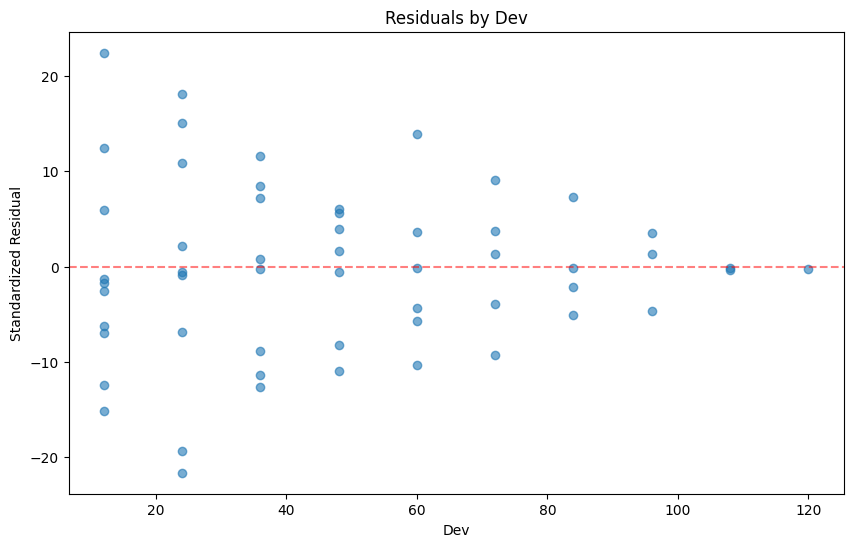

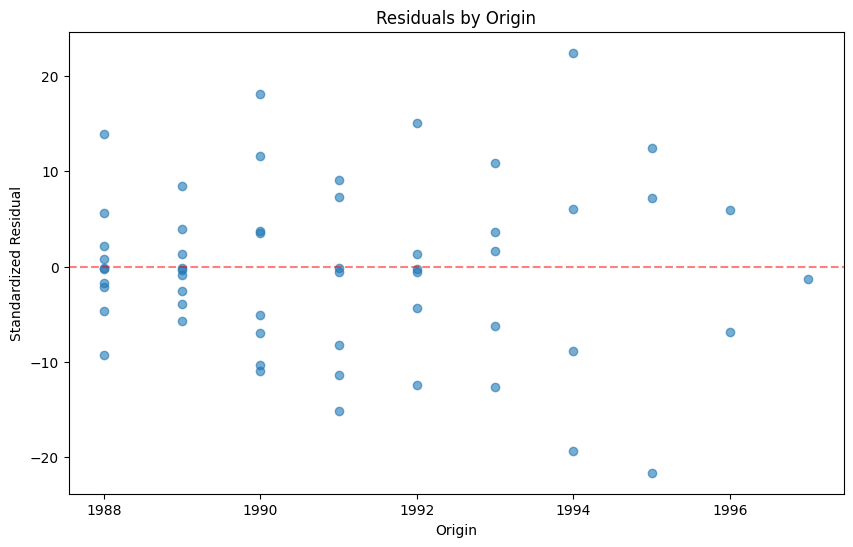

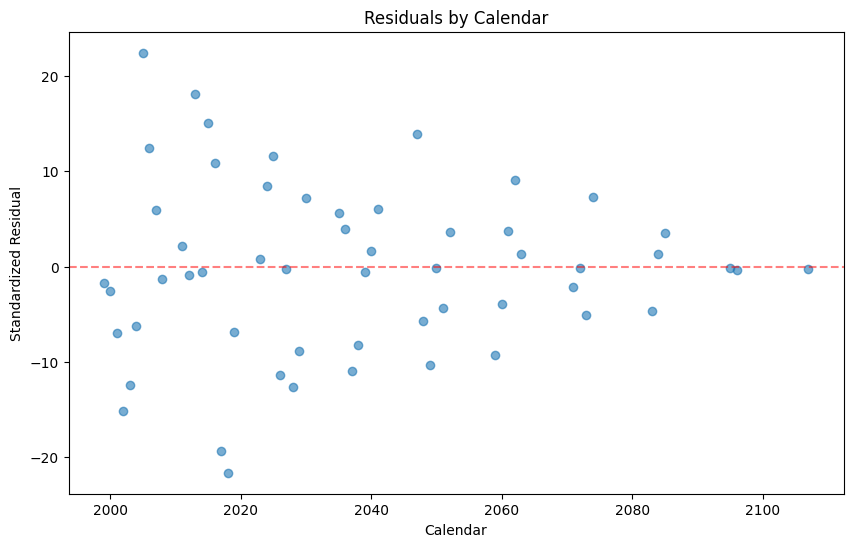

In [17]:
from bayesianchainladder import (
    plot_trace,
    plot_ppc,
    plot_reserve_distribution,
    plot_residuals,
    plot_heatmap_residuals,
    plot_development_pattern
)

fig, ax = plot_residuals(model, by="dev")
fig, ax = plot_residuals(model, by="origin")
fig, ax = plot_residuals(model, by="calendar")

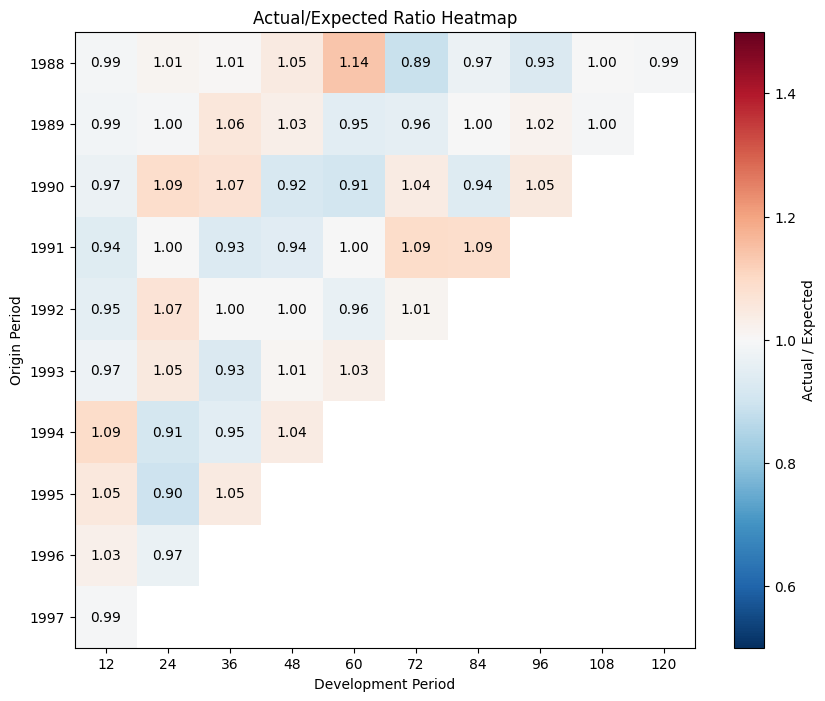

In [11]:
fig, ax = plot_heatmap_residuals(model)

In [15]:
model.ibnr_

,mean,std,median,5%,25%,75%,95%
origin,,,,,,,
1989,3439.559552,282.925248,3424.053961,2995.928913,3245.510746,3620.069127,3921.587827
1990,8167.335436,450.732013,8150.182720,7459.252154,7862.076032,8463.659072,8916.534407
1991,15127.346458,703.215854,15102.465334,14018.089121,14656.851830,15571.005344,16337.929672
1992,22739.942211,944.023019,22734.396606,21197.508923,22112.383562,23363.981371,24284.995743
1993,31924.440460,1347.197667,31880.049446,29821.355010,30991.992634,32811.974994,34214.019972
1994,45572.837955,1979.300807,45520.545298,42423.902472,44219.668632,46861.044313,48891.554275
1995,60350.140935,2843.266928,60277.436246,55819.233648,58447.380061,62148.443941,65097.153760
1996,81204.141054,4535.910014,81072.071933,74038.360123,78159.349428,84051.449894,88716.441576
1997,106664.028467,8447.041997,106150.364242,93569.377318,100896.826416,112096.152660,121091.092185


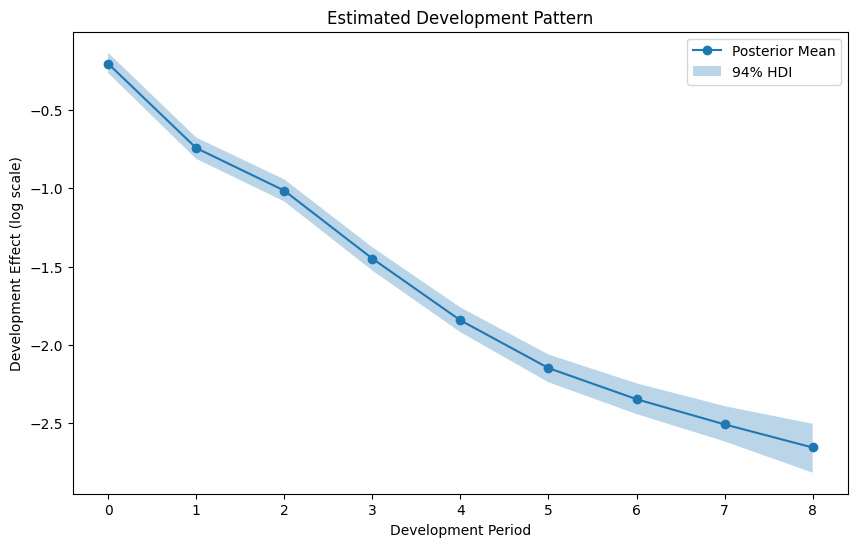

In [18]:
fig, ax = plot_development_pattern(model)

In [22]:
from bayesianchainladder import extract_parameter_summary

extract_parameter_summary(model.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

TypeError: extract_parameter_summary() got an unexpected keyword argument 'filter_vars'